In [45]:
# library
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
file_path = "D:\Bengkod-14130\Dataset\ObesityDataSet.csv"

In [47]:
#load dataset
df = pd.read_csv(file_path, keep_default_na=True)

#Menampilkan 5 data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

## informasi dataset

In [48]:
#Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

## cek dan menangani missing value 

In [49]:
#Menampilkan missing value
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [50]:
# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## visuslisasi pada kelas target

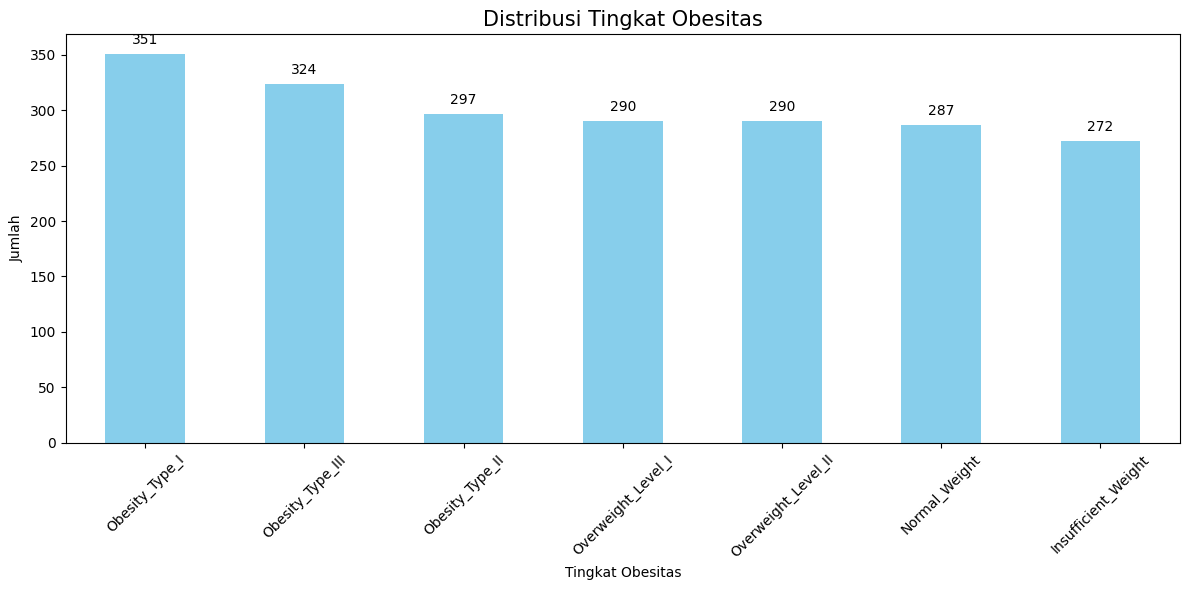

In [51]:
# Visualisasi distribusi kelas target
try:
    plt.figure(figsize=(12, 6))
    ax = df['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribusi Tingkat Obesitas', fontsize=15)
    plt.xlabel('Tingkat Obesitas')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    # Menambahkan label jumlah di atas bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error saat visualisasi distribusi kelas target: {e}")

## cek kategorikal unik

In [52]:
# cek variabel kategorikal
df.describe(include=['object'])

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,138,1065,70,69,1391,1855,655,1195,2007,2059,447,1718,412,561,1758,1578,351


In [53]:
# Cek nilai unik di setiap kolom
print("\nNilai unik untuk setiap kolom:")
for column in df.columns:
    try:
        unique_count = df[column].nunique()
        print(f"{column}: {unique_count} nilai unik")
        
        # Tampilkan nilai unik jika jumlahnya kurang dari 10
        if unique_count < 10:
            print(f"  {sorted(df[column].unique())}")
    except Exception as e:
        print(f"Error saat cek nilai unik untuk kolom {column}: {e}")


Nilai unik untuk setiap kolom:
Age: 1394 nilai unik
Gender: 3 nilai unik
  ['?', 'Female', 'Male']
Height: 1562 nilai unik
Weight: 1518 nilai unik
CALC: 5 nilai unik
  ['?', 'Always', 'Frequently', 'Sometimes', 'no']
FAVC: 3 nilai unik
  ['?', 'no', 'yes']
FCVC: 808 nilai unik
NCP: 637 nilai unik
SCC: 3 nilai unik
  ['?', 'no', 'yes']
SMOKE: 3 nilai unik
  ['?', 'no', 'yes']
CH2O: 1263 nilai unik
family_history_with_overweight: 3 nilai unik
  ['?', 'no', 'yes']
FAF: 1186 nilai unik
TUE: 1130 nilai unik
CAEC: 5 nilai unik
  ['?', 'Always', 'Frequently', 'Sometimes', 'no']
MTRANS: 6 nilai unik
  ['?', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
NObeyesdad: 7 nilai unik
  ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


## cek data dublikat

In [54]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 18


In [55]:
# Hapus duplikat
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris setelah menghapus duplikat: 2093
Jumlah baris duplikat: 0


In [56]:
# Cek keseimbangan data (class balance)
try:
    if 'NObeyesdad' in df.columns:
        class_balance = df['NObeyesdad'].value_counts(normalize=True) * 100
        print("\nKeseimbangan kelas:")
        print(class_balance)
    else:
        print("Kolom target NObeyesdad tidak ditemukan")
except Exception as e:
    print(f"Error saat cek keseimbangan data: {e}")


Keseimbangan kelas:
Obesity_Type_I         16.770186
Obesity_Type_III       15.480172
Obesity_Type_II        14.190158
Overweight_Level_II    13.855710
Normal_Weight          13.616818
Overweight_Level_I     13.186813
Insufficient_Weight    12.900143
Name: NObeyesdad, dtype: float64
